# Seaborn Objects Interfejs

## Seminarski rad - SISJ

**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236  
**Datum:** 23.07.2025.

### Deo 4: Novi objektno-orijentisani interfejs u Seaborn-u

---

## 1. Šta je Objects interfejs?

Seaborn 0.12+ uvodi **objektno-orijentisani interfejs** koji menja način na koji kreiramo grafikone.

### 1.1 Osnovna razlika:

**Tradicionalni pristup:**
```python
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
```

**Objects pristup:**
```python
(so.Plot(tips, x="total_bill", y="tip")
 .add(so.Dot(), color="time")
 .show())
```

### 1.2 Ključne komponente:

| **Komponenta** | **Svrha** | **Primer** |
|----------------|-----------|------------|
| **Plot()** | Osnova grafika | `so.Plot(data, x="var1", y="var2")` |
| **Mark** | Vizuelni elementi | `so.Dot()`, `so.Line()`, `so.Bar()` |
| **Stat** | Transformacije | `so.Agg()`, `so.KDE()` |
| **Scale** | Mapiranje podataka | `so.Continuous()`, `so.Nominal()` |

### 1.3 Prednosti:

✅ **Kompozicija** - lako kombinovanje elemenata  
✅ **Čitljivost** - jasniji kod  
✅ **Fleksibilnost** - više kontrole  
✅ **Modularnost** - komponente se mogu menjati nezavisno

---

In [8]:
# Uvoz biblioteka i učitavanje podataka
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Pokušaj uvoza Objects interface
try:
    import seaborn.objects as so
    objects_available = True
    print("✅ Objects interface dostupan!")
except ImportError:
    objects_available = False
    print("⚠️ Objects interface nije dostupan - koristi se fallback")

# Podešavanje
sns.set_theme()

# Učitavanje dataset-a
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

print(f"Tips dataset: {tips.shape}")
print(f"Flights dataset: {flights.shape}")

✅ Objects interface dostupan!
Tips dataset: (244, 7)
Flights dataset: (144, 3)


## 2. Plot objekat - osnova svega

**Plot objekat** je osnovni kontejner u Objects interfejsu:

```python
so.Plot(data, x="varijabla", y="varijabla")
```

In [ ]:
# Poređenje tradicionalnog vs Objects pristupa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. Tradicionalni seaborn pristup
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", ax=ax1)
ax1.set_title('Tradicionalni pristup\nsns.scatterplot()')

# 2. Objects pristup
if objects_available:
    (so.Plot(tips, x="total_bill", y="tip")
     .add(so.Dot(), color="time")
     .on(ax2)
     .show())
    ax2.set_title('Objects pristup\nso.Plot().add(so.Dot())')
else:
    # Fallback ako Objects nije dostupan
    sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", ax=ax2)
    ax2.set_title('Objects pristup (fallback)')

plt.tight_layout()
plt.show()

print("Ključne razlike:")
print("✅ Objects: eksplicitni Mark objekti") 
print("✅ Tradicionalni: direktni rezultat")
print("→ Oba daju isti rezultat, različita sintaksa")

In [ ]:
# Osnovni Mark objekti - 4 primera
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

if objects_available:
    # 1. Dot mark - scatter plot
    (so.Plot(tips, x="total_bill", y="tip")
     .add(so.Dot())
     .on(axes[0,0])
     .show())
    axes[0,0].set_title("so.Dot() - tačke")
    
    # 2. Line mark - linijski grafik
    (so.Plot(flights.head(20), x="year", y="passengers") 
     .add(so.Line())
     .on(axes[0,1])
     .show())
    axes[0,1].set_title("so.Line() - linije")
    
    # 3. Bar mark - stubičasti
    day_tips = tips.groupby('day')['tip'].mean().reset_index()
    (so.Plot(day_tips, x="day", y="tip")
     .add(so.Bar())
     .on(axes[1,0])
     .show())
    axes[1,0].set_title("so.Bar() - stubovi")
    
    # 4. Area mark - površina
    (so.Plot(flights.head(20), x="year", y="passengers")
     .add(so.Area(alpha=0.7))
     .on(axes[1,1])
     .show())
    axes[1,1].set_title("so.Area() - površina")
    
else:
    # Fallback - koristi standardni seaborn
    sns.scatterplot(data=tips, x="total_bill", y="tip", ax=axes[0,0])
    axes[0,0].set_title("Dot mark (fallback)")
    
    sns.lineplot(data=flights.head(20), x="year", y="passengers", ax=axes[0,1])
    axes[0,1].set_title("Line mark (fallback)")
    
    sns.barplot(data=tips, x="day", y="tip", ax=axes[1,0])
    axes[1,0].set_title("Bar mark (fallback)")
    
    flights_sample = flights.head(20)
    axes[1,1].fill_between(flights_sample['year'], flights_sample['passengers'], alpha=0.7)
    axes[1,1].set_title("Area mark (fallback)")
    axes[1,1].set_xlabel('year')
    axes[1,1].set_ylabel('passengers')

plt.tight_layout()
plt.show()

print("✅ 4 osnovna Mark objekta prikazana!")
print("→ Svaki Mark određuje kako podaci izgledaju")

## 4. Dodavanje boja i kategorija

Objects interfejs omogućava lako mapiranje varijabli na vizuelne elemente.

### Mapiranje boja:
- `color="varijabla"` - mapira varijablu na boje
- Automatski kreira legendu

### Primer sa kategorijama:

## 5. Kombinovanje Mark objekata

Objects interfejs omogućava kombinovanje različitih Mark-ova u jednom grafikonu.

### Primer: tačke + linija trenda

## 5. Kombinovanje Mark objekata

Objects interfejs omogućava kombinovanje različitih Mark-ova u jednom grafikonu.

### Primer: tačke + linija trenda

## 6. Faceting - podela grafika

Faceting omogućava kreiranje više malih grafika podeljenih po kategorijama.

### Primer: grafik za svaki dan

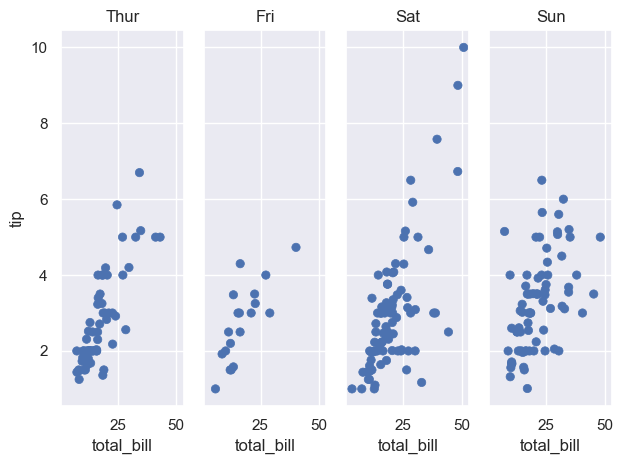

✅ Faceting po danima!
→ facet(col='day') kreira subplot za svaki dan

Faceting + boje:


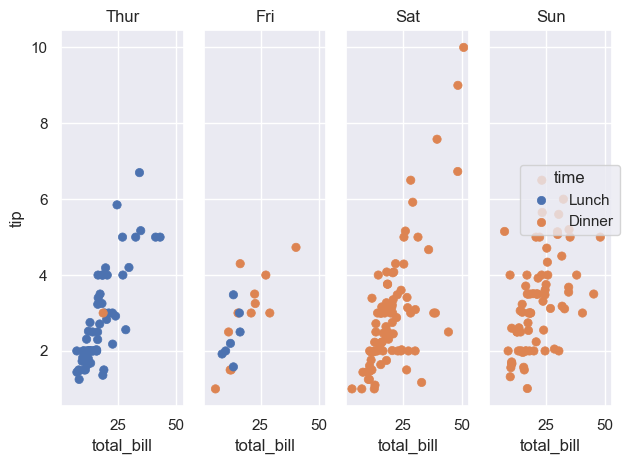

In [6]:
# Faceting - podela po kategorijama
if objects_available:
    # Faceting po danima
    (so.Plot(tips, x="total_bill", y="tip")
     .add(so.Dot())
     .facet(col="day")
     .show())
     
    print("✅ Faceting po danima!")
    print("→ facet(col='day') kreira subplot za svaki dan")
    
else:
    # Fallback sa FacetGrid
    g = sns.FacetGrid(tips, col="day", height=4, aspect=0.7)
    g.map(sns.scatterplot, "total_bill", "tip")
    plt.show()
    print("⚠️ Korišten FacetGrid fallback")
    
# Dodatni primer - faceting sa bojama
print("\nFaceting + boje:")
if objects_available:
    (so.Plot(tips, x="total_bill", y="tip", color="time")
     .add(so.Dot())
     .facet(col="day")
     .show())
else:
    g2 = sns.FacetGrid(tips, col="day", height=4, aspect=0.7)
    g2.map(sns.scatterplot, "total_bill", "tip", hue="time")
    g2.add_legend()
    plt.show()

## 7. Zaključak o Seaborn Objects

### Glavne prednosti Objects interfejsa:

1. **Jasna sintaksa** - svaki deo grafika je eksplicitan
2. **Modularnost** - lako kombinovanje različitih elemenata  
3. **Konzistentnost** - isti pristup za sve tipove grafikona
4. **Fleksibilnost** - lako dodavanje novih elemenata

### Kada koristiti Objects:
- Za složenije grafikone sa više slojeva
- Kada trebate preciznu kontrolu
- Za kreiranje custom grafikona

### Kada koristiti klasični seaborn:
- Za brze analize i eksploraciju
- Za standardne tipove grafikona
- Kada je jednostavnost bitnija

### Ključna razlika:
**Objects = eksplicitno, modularne komponente**  
**Klasični = implicitno, direktni rezultat**

---

**Napomena**: Objects interfejs je nastao kako bi seaborn bio elegantniji i fleksibilniji za složene slučajeve korišćenja.